# Commodity Price Changes in Gaza



In [395]:
# Step 1: Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt


In [396]:
# Step 2: Load the dataset
file_path = 'C:/Users/faraz/Downloads/Niksun/ml_datasets/War_21st Century_Israel-Hamas_War/commodity-prices-in-gaza-4-1.xlsx'
commodity_data = pd.read_excel(file_path)


commodity_data.head()

,Unnamed: 0,commodity name (arabic),amount (arabic),commodity name (english),amount (english),average price before 7 October 2023,average price after 7 October 2023,Monthly Percent Change % (Oct-Sep),2023-11-01 00:00:00,Monthly Percent Change % (Nov.-Oct.),...,Monthly Percent Change % (Nov-Dec),2024-01-01 00:00:00,Monthly Percent Change % (Dec-Jan),2024-02-01 00:00:00,Monthly Percent Change % (Jan-Feb),2024-03-01 00:00:00,Monthly Percent Change % (Feb-Mar),2024-04-01 00:00:00,Monthly Percent Change % (Mar-Apr),Acumulative change
0,11100102,أرز حبة طويلة الياسمين تايلند - 1 كغم,1 كغم,rice (1 kg),1 kg,7.727273,9.000000,0.164706,8.938776,-6.802721e-03,...,0.447489,12.938776,0.000000,12.938776,0.000000,12.938776,0.0,12.938776,0.000000,0.674430
1,11100206,طحين أبيض - مطاحن السلام - محلي,50 كغم,flour (50 kg),50 kg,91.000000,150.000000,0.648352,204.375000,3.625000e-01,...,3.036697,1025.000000,24.242424,1025.000000,0.000000,1025.000000,0.0,1025.000000,0.000000,10.263736
2,11100301,خبز ابيض كماج- محلي,1 كغم,bread (3 kg),3 kg,7.000000,8.000000,0.142857,8.000000,-1.278977e-15,...,0.000000,6.000000,-25.000000,10.000000,66.666667,10.000000,0.0,8.375000,-16.250000,0.196429
3,11220102,دجاج طازج دون الريش - محلي,1 كغم,chickens (1 kg),1 kg,16.000000,16.615385,0.038462,21.000000,2.638889e-01,...,0.396825,29.333333,0.000000,29.333333,0.000000,29.333333,0.0,29.333333,0.000000,0.833333
4,11430001,بيض دجاج أبيض - محلي,كرتونة / 2 كغم,eggs (2 kg),2 kg,13.333333,18.000000,0.350000,31.250000,7.361111e-01,...,0.920000,53.750000,-10.416667,100.000000,86.046512,122.500000,22.5,60.000000,-51.020408,3.500000


### Step 3: Preprocess the data
We will check for missing values, handle them, and make sure the 'Date' column is in datetime format.

In [397]:
print(commodity_data.columns)

Index([                          'Unnamed: 0',
                    'commodity name (arabic)',
                            'amount (arabic)',
                   'commodity name (english)',
                           'amount (english)',
        'average price before 7 October 2023',
         'average price after 7 October 2023',
         'Monthly Percent Change % (Oct-Sep)',
                          2023-11-01 00:00:00,
       'Monthly Percent Change % (Nov.-Oct.)',
                          2023-12-01 00:00:00,
         'Monthly Percent Change % (Nov-Dec)',
                          2024-01-01 00:00:00,
         'Monthly Percent Change % (Dec-Jan)',
                          2024-02-01 00:00:00,
         'Monthly Percent Change % (Jan-Feb)',
                          2024-03-01 00:00:00,
         'Monthly Percent Change % (Feb-Mar)',
                          2024-04-01 00:00:00,
         'Monthly Percent Change % (Mar-Apr)',
                         'Acumulative change'],
      dtype=

In [398]:
# Checking for missing values
commodity_data.isnull().sum()

Unnamed: 0                              0
commodity name (arabic)                 0
amount (arabic)                         0
commodity name (english)                0
amount (english)                        0
average price before 7 October 2023     0
average price after 7 October 2023      0
Monthly Percent Change % (Oct-Sep)      0
2023-11-01 00:00:00                     0
Monthly Percent Change % (Nov.-Oct.)    0
2023-12-01 00:00:00                     0
Monthly Percent Change % (Nov-Dec)      0
2024-01-01 00:00:00                     0
Monthly Percent Change % (Dec-Jan)      0
2024-02-01 00:00:00                     0
Monthly Percent Change % (Jan-Feb)      0
2024-03-01 00:00:00                     0
Monthly Percent Change % (Feb-Mar)      0
2024-04-01 00:00:00                     0
Monthly Percent Change % (Mar-Apr)      0
Acumulative change                      0
dtype: int64

In [399]:
# Dropping the 'commodity name (arabic)',amount arabic column
commodity_data = commodity_data.drop(columns=['Unnamed: 0','commodity name (arabic)','amount (arabic)'])
commodity_data.head()

#Removing Extra Information from Commodity Name 
commodity_data['commodity name (english)'] = commodity_data['commodity name (english)'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# Reassign the full column names manually
commodity_data.columns = ['Commodity Name', 'Amount', 'Price-7th October', 
                          'average price after 7 October 2023', 'Monthly Percent Change % (Oct-Sep)', 
                          'Nov-23', 'Monthly Percent Change % (Nov-Oct)', 'Dec-23', 
                          'Monthly Percent Change % (Nov-Dec)', 'Jan-24', 
                          'Monthly Percent Change % (Dec-Jan)', 'Feb-24', 
                          'Monthly Percent Change % (Jan-Feb)', 'Mar-24', 
                          'Monthly Percent Change % (Feb-Mar)', 'Apr-24', 
                          'Monthly Percent Change % (Mar-Apr)', 'Acumulative change']
#Display DataFrame
commodity_data.head(10)

,Commodity Name,Amount,Price-7th October,average price after 7 October 2023,Monthly Percent Change % (Oct-Sep),Nov-23,Monthly Percent Change % (Nov-Oct),Dec-23,Monthly Percent Change % (Nov-Dec),Jan-24,Monthly Percent Change % (Dec-Jan),Feb-24,Monthly Percent Change % (Jan-Feb),Mar-24,Monthly Percent Change % (Feb-Mar),Apr-24,Monthly Percent Change % (Mar-Apr),Acumulative change
0,rice,1 kg,7.727273,9.000000,0.164706,8.938776,-6.802721e-03,12.938776,0.447489,12.938776,0.000000,12.938776,0.000000,12.938776,0.000000,12.938776,0.000000,0.674430
1,flour,50 kg,91.000000,150.000000,0.648352,204.375000,3.625000e-01,825.000000,3.036697,1025.000000,24.242424,1025.000000,0.000000,1025.000000,0.000000,1025.000000,0.000000,10.263736
2,bread,3 kg,7.000000,8.000000,0.142857,8.000000,-1.278977e-15,8.000000,0.000000,6.000000,-25.000000,10.000000,66.666667,10.000000,0.000000,8.375000,-16.250000,0.196429
3,chickens,1 kg,16.000000,16.615385,0.038462,21.000000,2.638889e-01,29.333333,0.396825,29.333333,0.000000,29.333333,0.000000,29.333333,0.000000,29.333333,0.000000,0.833333
4,eggs,2 kg,13.333333,18.000000,0.350000,31.250000,7.361111e-01,60.000000,0.920000,53.750000,-10.416667,100.000000,86.046512,122.500000,22.500000,60.000000,-51.020408,3.500000
5,oil,3 liters,30.400000,33.846154,0.113360,38.000000,1.227273e-01,61.666667,0.622807,92.500000,50.000000,95.000000,2.702703,73.750000,-22.368421,52.000000,-29.491525,0.710526
6,lemons,1 kg,2.562500,4.979167,0.943089,4.000000,-1.966527e-01,6.666667,0.666667,8.500000,27.500000,15.666667,84.313725,20.250000,29.255319,16.500000,-18.518519,5.439024
7,apples,1 kg,4.875000,7.000000,0.435897,5.468750,-2.187500e-01,5.468750,0.000000,25.000000,357.142857,27.500000,10.000000,31.250000,13.636364,19.500000,-37.600000,3.000000
8,tomatoes,1 kg,5.000000,6.750000,0.350000,5.125000,-2.407407e-01,6.750000,0.317073,5.282609,-21.739130,7.826087,48.148148,9.097826,16.250000,9.978261,9.677419,0.995652
9,zucchinis,1 kg,3.875000,5.875000,0.516129,4.000000,-3.191489e-01,6.000000,0.500000,6.000000,0.000000,15.000000,150.000000,20.250000,35.000000,15.500000,-23.456790,3.000000


### Step 4: Add New Features
We will create new features like moving averages and price changes to better understand the trends.

In [400]:
    # Calculate the overall price change from before and after 7 October 2023
    commodity_data['% Sept-Oct'] = ((commodity_data['average price after 7 October 2023'] - 
                                                           commodity_data['Price-7th October']) / 
                                                           commodity_data['Price-7th October']) * 100

    commodity_data['% Oct-Nov'] = ((commodity_data['Nov-23'] -
                                                 commodity_data['average price after 7 October 2023']) / 
                                                 commodity_data['average price after 7 October 2023']) * 100

    commodity_data['% Nov-Dec'] = ((commodity_data['Dec-23'] - 
                                                           commodity_data['Nov-23']) / 
                                                           commodity_data['Nov-23']) * 100

    commodity_data['% Dec-Jan'] = ((commodity_data['Jan-24'] - 
                                                           commodity_data['Dec-23']) / 
                                                           commodity_data['Dec-23']) * 100

    commodity_data['% Jan-Feb'] = ((commodity_data['Feb-24'] - 
                                                           commodity_data['Jan-24']) / 
                                                           commodity_data['Jan-24']) * 100
    commodity_data['% Feb-Mar'] = ((commodity_data['Mar-24'] - 
                                                           commodity_data['Feb-24']) / 
                                                           commodity_data['Feb-24']) * 100
    commodity_data['% March-April'] = ((commodity_data['Apr-24'] - 
                                                           commodity_data['Mar-24']) / 
                                                           commodity_data['Mar-24']) * 100

    # Display the updated dataframe with the new price change feature
    commodity_price_change =commodity_data[['Commodity Name','Amount','Price-7th October','% Sept-Oct','% Oct-Nov','% Nov-Dec','% Dec-Jan','% Jan-Feb','% Feb-Mar','% March-April','Acumulative change']].head(10)

    commodity_price_change.head(10)

,Commodity Name,Amount,Price-7th October,% Sept-Oct,% Oct-Nov,% Nov-Dec,% Dec-Jan,% Jan-Feb,% Feb-Mar,% March-April,Acumulative change
0,rice,1 kg,7.727273,16.470588,-6.802721e-01,44.748858,0.000000,0.000000,0.000000e+00,0.000000,0.674430
1,flour,50 kg,91.000000,64.835165,3.625000e+01,303.669725,24.242424,0.000000,0.000000e+00,0.000000,10.263736
2,bread,3 kg,7.000000,14.285714,-1.332268e-13,0.000000,-25.000000,66.666667,7.105427e-14,-16.250000,0.196429
3,chickens,1 kg,16.000000,3.846154,2.638889e+01,39.682540,0.000000,0.000000,0.000000e+00,0.000000,0.833333
4,eggs,2 kg,13.333333,35.000000,7.361111e+01,92.000000,-10.416667,86.046512,2.250000e+01,-51.020408,3.500000
5,oil,3 liters,30.400000,11.336032,1.227273e+01,62.280702,50.000000,2.702703,-2.236842e+01,-29.491525,0.710526
6,lemons,1 kg,2.562500,94.308943,-1.966527e+01,66.666667,27.500000,84.313725,2.925532e+01,-18.518519,5.439024
7,apples,1 kg,4.875000,43.589744,-2.187500e+01,0.000000,357.142857,10.000000,1.363636e+01,-37.600000,3.000000
8,tomatoes,1 kg,5.000000,35.000000,-2.407407e+01,31.707317,-21.739130,48.148148,1.625000e+01,9.677419,0.995652
9,zucchinis,1 kg,3.875000,51.612903,-3.191489e+01,50.000000,0.000000,150.000000,3.500000e+01,-23.456790,3.000000


In [404]:
# Calculate the standard deviation (volatility) of the monthly prices for each commodity
month_columns = ['Nov-23','Dec-23','Jan-24','Feb-24','Mar-24','Apr-24']
commodity_data['Price Volatility'] = commodity_data[month_columns].std(axis=1)

# Display the price volatility
commodity_data[['Commodity Name', 'Price Volatility']].head(20)


,Commodity Name,Price Volatility
0,rice,1.632993
1,flour,328.576574
2,bread,1.496698
3,chickens,3.402069
4,eggs,33.503731
5,oil,22.602631
6,lemons,6.425301
7,apples,11.178069
8,tomatoes,1.988656
9,zucchinis,6.644076


In [405]:
# Define a dictionary to group commodities (you can adjust this to fit your data)
commodity_groups = {
    'rice': 'grains',
    'flour': 'grains',
    'bread': 'grains',
    'chickens': 'proteins',
    'eggs': 'proteins',
    'oil': 'oils',
    'lemons': 'fruits',
    'apples': 'fruits',
    'tomatoes': 'vegetables',
    'zucchinis': 'vegetables',
    'eggplants': 'vegetables',
    'chili pepper': 'vegetables',
    'bell pepper': 'vegetables',
    'cucumbers': 'vegetables',
    'dry onions': 'vegetables',
    'potato': 'vegetables',
    'mineral water bottle': 'beverages',
    'gasoline': 'fuel',
    'diesel': 'fuel',
    'passenger travel expenses (north to the center)': 'services',
    'passenger travel expenses (north to the south)': 'services',
    'biscuits': 'snacks',
    'Crushed bulgur': 'grains',
    'Crushed dry freekeh': 'grains',
    'Fresh Veal': 'proteins',
    'Fresh Lamb With Bone': 'proteins',
    'Baby Milk Powder': 'dairy',
    'Cheese': 'dairy',
    'Pure white sugar': 'sweets',
    'White Table Salt': 'condiments',
    'white yeast': 'baking essentials',
    'Ground coffee': 'beverages',
    'White Canned Cooked Beans': 'canned foods',
    'Egyptian beans medames': 'grains',
    'crushed red lentils': 'grains',
    'Tomato Paste': 'canned foods',
    'Marlboro Cigarettes': 'tobacco',
    'L-M cigarettes': 'tobacco',
    'Gas Cylinder': 'fuel',
    'Potable water distributed using tankers ': 'water distribution',
    'Potable water distributed using tankers': 'water distribution',
    'Potable water distributed using tankers ': 'water distribution'
}


# Apply the commodity grouping based on the cleaned commodity names
commodity_data['Commodity Group'] = commodity_data['Commodity Name'].map(commodity_groups)

# Display the grouped data
commodity_data[['Commodity Name', 'Commodity Group']].head(10)


,Commodity Name,Commodity Group
0,rice,grains
1,flour,grains
2,bread,grains
3,chickens,proteins
4,eggs,proteins
5,oil,oils
6,lemons,fruits
7,apples,fruits
8,tomatoes,vegetables
9,zucchinis,vegetables


### Step 5: Visualize the Data
Now, we will create 5 different visualizations to explore the commodity price trends.

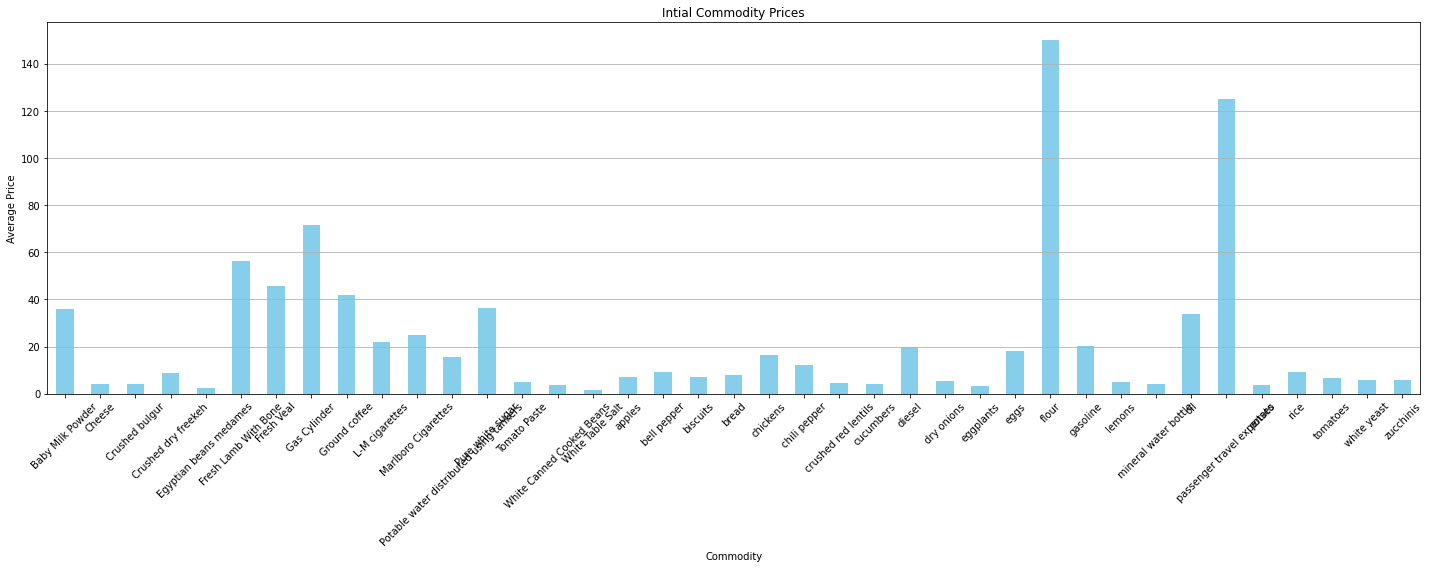

In [403]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming commodity_data is your dataframe

# Calculating the average price of each commodity
average_prices = commodity_data.groupby('Commodity Name')['average price after 7 October 2023'].mean()

# Plotting the bar chart for average prices of each commodity
plt.figure(figsize=(20, 8))
average_prices.plot(kind='bar', color='skyblue')

plt.title('Intial Commodity Prices')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
